<a href="https://colab.research.google.com/github/theJoChong/data-with-python/blob/main/P_02a_Air_Quality_Mini_Project_(Github).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Air Quality Trends in Dundee (2024)


---



***When are nitrogen dioxide (NO₂) levels highest in Dundee?***

NO₂ is a harmful pollutant emitted primarily by transportation, posing risks to both health and the environment. This project investigates NO₂ levels in Dundee to identify peak pollution periods and their implications for public health and policy.

This project uses an open-source dataset from UK Air Information Resource Website (uk-air.defra.gov.uk). The dataset includes date, time, and NO₂ concentration levels in Dundee for the entire year of 2024.

In [10]:
# Step 1: Import Libraries
from google.colab import drive
from google.colab import files
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [32]:
# Step 2: Load the dataset
drive.mount('/content/drive', force_remount=True)
file_path = "/content/drive/MyDrive/Upskill & Courses/Data Analyst/Code Division/Women and Data/Data with Python/Colab_data/2024DundeeAirQualityDataHourly.csv"
df = pd.read_csv(file_path)

Mounted at /content/drive


In [27]:
# Step 3: Check the data structure
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8788 entries, 0 to 8787
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              8785 non-null   object
 1   Time              8784 non-null   object
 2   Nitrogen dioxide  8784 non-null   object
 3   Status            8784 non-null   object
dtypes: object(4)
memory usage: 274.8+ KB
None


In [33]:
# Step 4: Initial cleaning

# Convert date into datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')

# Replacing "24:00:00" with "00:00:00"
df['Time'] = df['Time'].replace("24:00:00", "00:00:00")

# Convert 'Nitrogen dioxide' to numeric
df['Nitrogen dioxide'] = pd.to_numeric(df['Nitrogen dioxide'], errors='coerce')

# Combine 'Date' and 'Time' into a single column first as string
df['DateTime_str'] = df['Date'].astype(str) + ' ' + df['Time'].astype(str)

# Convert the combined 'DateTime_str' to datetime
df['DateTime'] = pd.to_datetime(df['DateTime_str'], errors='coerce')

# Remove null data
df_cleaned = df.dropna()
print(f"Original dataset: {df.shape[0]} rows")
print(f"Cleaned dataset: {df_cleaned.shape[0]} rows")
df = df_cleaned

Original dataset: 8788 rows
Cleaned dataset: 8737 rows


In [29]:
# Step 5: Understand data
df['Nitrogen dioxide'].describe()

,Nitrogen dioxide
count,8737.000000
mean,6.756268
std,7.691156
min,-0.004010
25%,2.390300
50%,4.279790
75%,7.826030
max,63.629110


The highest average NO₂ concentration occurs at 9:00 with 9.60 µg/m³.


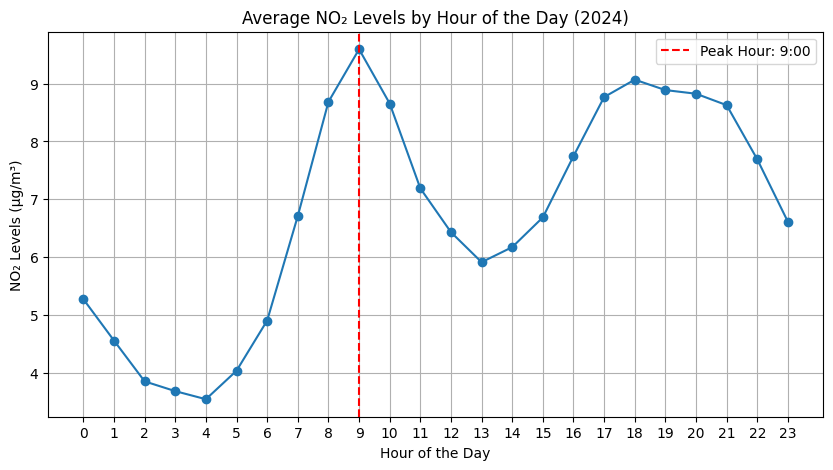

In [34]:
# Step 6: Examine nitrogen dioxide levels

# Step 6.1: Compute nitrogen dioxide levels by hour of the day

# Extract hour
df['Hour'] = df['DateTime'].dt.hour

# Group by hour and calculate average NO₂ concentration
hourly_avg_no2 = df.groupby('Hour')['Nitrogen dioxide'].mean()

# Find the hour with the highest NO₂ concentration
peak_hour = hourly_avg_no2.idxmax()
peak_value = hourly_avg_no2.max()

print(f"The highest average NO₂ concentration occurs at {peak_hour}:00 with {peak_value:.2f} µg/m³.")

# Plot the hourly NO₂ levels
plt.figure(figsize=(10, 5))
plt.plot(hourly_avg_no2.index, hourly_avg_no2.values, marker='o', linestyle='-')
plt.axvline(peak_hour, color='red', linestyle='--', label=f'Peak Hour: {peak_hour}:00')
plt.xlabel("Hour of the Day")
plt.ylabel("NO₂ Levels (µg/m³)")
plt.title("Average NO₂ Levels by Hour of the Day (2024)")
plt.legend()
plt.grid()
plt.xticks(range(0, 24))
plt.show()

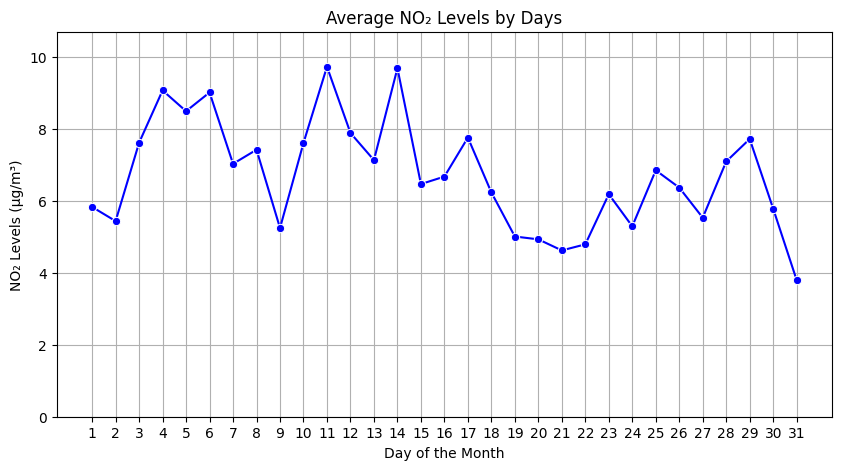

In [37]:
# Step 6.2: Compute nitrogen dioxide levels by days

# Extract day
df['Day'] = df['DateTime'].dt.day

# Group by day of the month
no2_by_day = df.groupby('Day')['Nitrogen dioxide'].mean()

# Plot the graph
plt.figure(figsize=(10, 5))
sns.lineplot(x=no2_by_day.index, y=no2_by_day.values, marker='o', color='b')
plt.xlabel("Day of the Month")
plt.ylabel("NO₂ Levels (µg/m³)")
plt.title("Average NO₂ Levels by Days")
plt.xticks(range(1, 32))  # Ensure all days are shown
plt.ylim(0, no2_by_day.max() * 1.1)  # Start y-axis from 0 and extend slightly beyond max value
plt.grid()
plt.show()

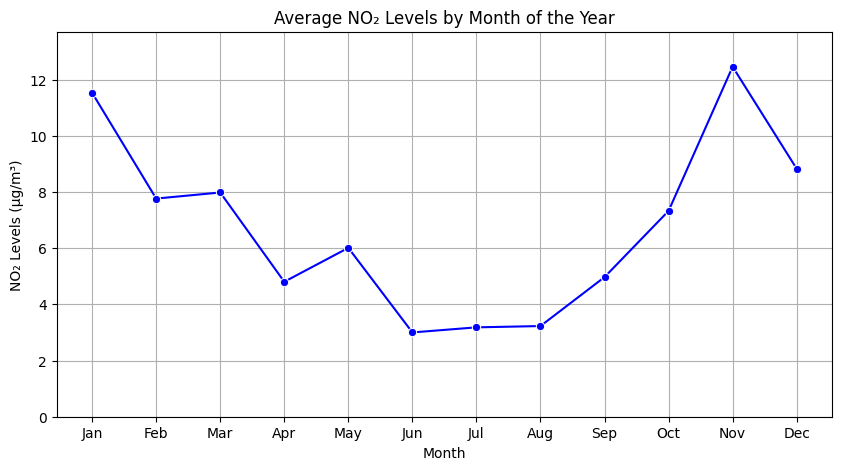

In [38]:
# Step 6.3: Compute nitrogen dioxide levels by months

# Extract month
df['Month'] = df['DateTime'].dt.month

# Group by month of the year
no2_by_month = df.groupby('Month')['Nitrogen dioxide'].mean()

# Plot the graph
plt.figure(figsize=(10, 5))
sns.lineplot(x=no2_by_month.index, y=no2_by_month.values, marker='o', color='b')
plt.xlabel("Month")
plt.ylabel("NO₂ Levels (µg/m³)")
plt.title("Average NO₂ Levels by Month of the Year")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylim(0, no2_by_month.max() * 1.1)  # Start y-axis from 0 and extend slightly beyond max value
plt.grid()
plt.show()

In [7]:
# Step 7: Download dataset
df.to_csv("2024_Dundee_NO₂_ByHour.csv", index=False)
files.download("2024_Dundee_NO₂_ByHour.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Key Findings**
*  Daily Trend: NO₂ peaks at 9 AM and 6 PM, aligning with rush hours and office-related traffic.
*   Monthly Trend: Higher emissions in the first half of the month compared to the second half.
*   Seasonal Trend: Peak emissions in January and November (before and after festive seasons), with the lowest in summer.

**Implications/Actions**
*   Policy: Increase public transport frequency during rush hours and festive seasons to reduce traffic-related emissions.
*   Public Health: Encourage outdoor activities like walking during lunchtime (when emissions are lower) and promote summer as the ideal time for outdoor activities in Dundee due to lower pollution levels.

**Future Research**

Explore potential reasons for higher emissions in the first half of the month (e.g., economic activity, weather patterns).